In [6]:
from Mnist_MoE.train_MoE import moe_train_loop, create_moe_model

nb_experts = 7

moe = create_moe_model(
        nb_experts=nb_experts, 
        k_training=3,
        k_inference=2, 
        tau=1, 
        lambda_balance=0.05 
    )

In [7]:


# Routing policy: 'hard' (tok_K), 'soft' (sotfmax or gumbell_softmax), 'hybrid' (soft with a thresholding)
# gumbell_softmax: True/False (only for 'soft' or 'hybrid' policies) False = softmax, True = gumbell_softmax
accuracies = {}
moe_train_info = moe_train_loop(moe, 
                                epochs=4,
                                selection_policy_t='soft',
                                selection_policy_i='hybrid', 
                                gumbell_softmax_t=True,
                                gumbell_softmax_i=False, 
                                threshold=None)
accuracies.update(moe_train_info[0])


Starting MoE training...
Number of Experts: 7 | k_training: 3 | k_inference: 2

experts: Expert 1: MNIST_CNN2, Expert 2: MNIST_CNN2, Expert 3: MNIST_CNN2, Expert 4: MNIST_CNN2, Expert 5: MNIST_CNN2, Expert 6: MNIST_CNN2, Expert 7: MNIST_CNN2

Epoch [1/4] - Train Loss: 0.3790, Train Acc: 90.05% | Test Loss: 0.1363, Test Acc: 95.81%
Expert Repartition: ['0.047', '0.235', '0.145', '0.134', '0.024', '0.188', '0.227']
 Lambda Balance: 0.050000

Epoch [2/4] - Train Loss: 0.1876, Train Acc: 95.86% | Test Loss: 0.0743, Test Acc: 97.61%
Expert Repartition: ['0.130', '0.059', '0.178', '0.020', '0.136', '0.217', '0.261']
 Lambda Balance: 0.050000

Epoch [3/4] - Train Loss: 0.1652, Train Acc: 96.65% | Test Loss: 0.0904, Test Acc: 97.03%
Expert Repartition: ['0.045', '0.105', '0.138', '0.041', '0.102', '0.205', '0.363']
 Lambda Balance: 0.050000

Epoch [4/4] - Train Loss: 0.1508, Train Acc: 97.05% | Test Loss: 0.0760, Test Acc: 97.58%
Expert Repartition: ['0.107', '0.157', '0.154', '0.082', '0.083

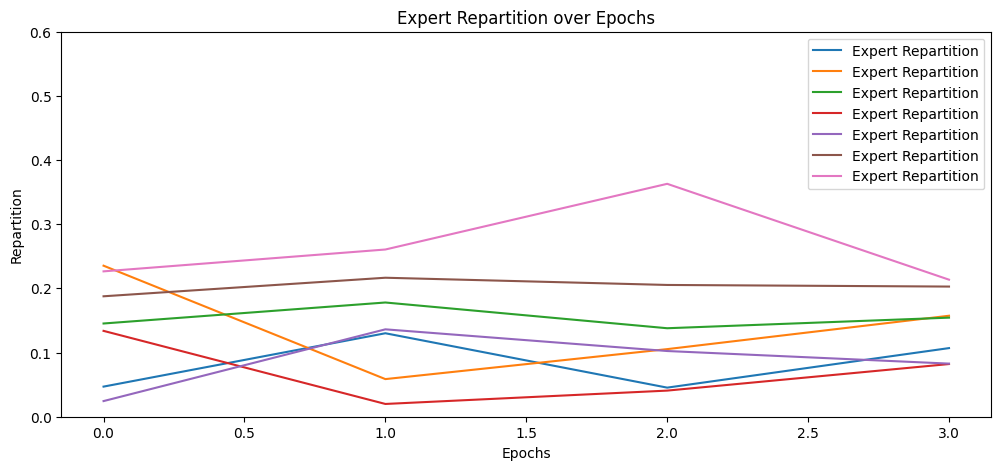

In [9]:
import matplotlib.pyplot as plt
informations = moe_train_info[1]

plt.figure(figsize=(12, 5))
plt.plot([informations[epoch]["repartition"] for epoch in informations], label="Expert Repartition")
plt.xlabel("Epochs")
plt.ylim(0, 0.6)
plt.ylabel("Repartition")
plt.title("Expert Repartition over Epochs")
plt.legend()
plt.show()

In [10]:
from Mnist_MoE.train_MoE import moe_eval_on_class
class_expert_acuation = moe_eval_on_class(moe, k=2, selection_policy='hard', gumbell_softmax=False)

Class 0 - Test Loss: 0.0610, Test Acc: 99.18% | Expert Repartition: [0.03469387755102041, 0.01173469387755102, 0.42397959183673467, 0.015816326530612244, 0.09642857142857143, 0.38010204081632654, 0.037244897959183676]

Class 1 - Test Loss: 0.0421, Test Acc: 98.94% | Expert Repartition: [0.04449339207048458, 0.28854625550660795, 0.00881057268722467, 0.13480176211453745, 0.0, 0.16740088105726872, 0.35594713656387666]

Class 2 - Test Loss: 0.0484, Test Acc: 98.26% | Expert Repartition: [0.060562015503875966, 0.06976744186046512, 0.26356589147286824, 0.06686046511627906, 0.04263565891472868, 0.34205426356589147, 0.15455426356589147]

Class 3 - Test Loss: 0.1224, Test Acc: 96.93% | Expert Repartition: [0.041584158415841586, 0.14702970297029702, 0.3113861386138614, 0.0297029702970297, 0.01881188118811881, 0.3910891089108911, 0.060396039603960394]

Class 4 - Test Loss: 0.0171, Test Acc: 99.29% | Expert Repartition: [0.14714867617107943, 0.109979633401222, 0.010692464358452138, 0.0957230142566

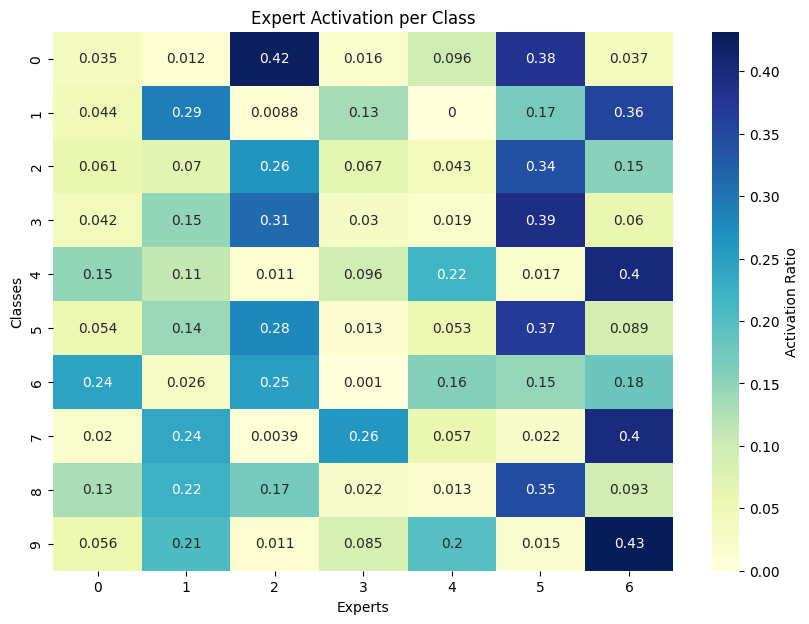

In [11]:
import seaborn as sns

# Extract the repartition arrays for each class and stack into a 2D array
import numpy as np
repartition_matrix = np.stack([class_expert_acuation[c]['repartition'] for c in class_expert_acuation])

plt.figure(figsize=(10, nb_experts))
sns.heatmap(repartition_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Activation Ratio'})
plt.xlabel("Experts")
plt.ylabel("Classes")
plt.title("Expert Activation per Class")
plt.show()